In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

df = pd.read_csv('/Users/eladg/Documents/Git/NYC_Data_IPA/Taxi/NYC Taxi Data/NYC Yellow Taxi Data/2014/Trips/NYC_Taxi_Yellow_trip_2014_7.csv')

/Users/eladg/anaconda/lib/python3.4/site-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [2]:
df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,9406D2C34715E1DA10AD4D4DDADF4DA5,0602DFD837433635FE860BDE2F14BC3A,VTS,1,NaN,2013-07-01 01:47:00,2013-07-01 01:52:00,1,300,1.17,-74.013229,40.714718,-74.003494,40.725285
1,73495B48481E673AD8D7578764C9EC98,66DA261DA2E0305435786C152085CCC2,VTS,1,NaN,2013-07-01 01:39:00,2013-07-01 01:52:00,1,780,4.17,-73.980865,40.763947,-73.933884,40.767677
2,85B6168FC88F4914E4741015B1678BF4,C2DB36C1124AB69269DBE1D3D39D37DB,VTS,1,NaN,2013-07-01 01:36:00,2013-07-01 01:50:00,1,840,2.98,-74.007568,40.740898,-73.980118,40.713985
3,85B6168FC88F4914E4741015B1678BF4,C2DB36C1124AB69269DBE1D3D39D37DB,VTS,1,NaN,2013-07-01 01:53:00,2013-07-01 01:57:00,1,240,0.75,-73.985466,40.718342,-73.982841,40.727016
4,8C6CFF1ED34957DCF1547C3C38EE0490,65AB951A1B846C3B0581A8A473830F73,VTS,1,NaN,2013-07-01 01:47:00,2013-07-01 01:59:00,1,720,1.76,-74.005630,40.726448,-74.003906,40.742031


In [3]:
pickup =  pd.to_datetime(df[' pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

In [34]:
pickup.apply(lambda x: x.hour)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
...
14385441    0
14385442    0
14385443    0
14385444    0
14385445    0
14385446    0
14385447    0
14385448    0
14385449    0
14385450    0
14385451    0
14385452    0
14385453    0
14385454    0
14385455    0
Name:  pickup_datetime, Length: 14385456, dtype: int64

In [26]:
m = pickup.apply(lambda x: x.day)

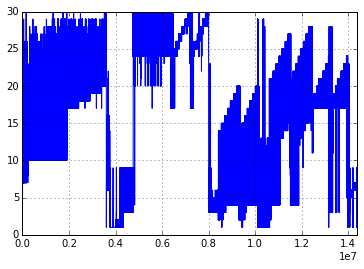

In [30]:
m.plot()

In [4]:
df.columns

Index(['medallion', ' hack_license', ' vendor_id', ' rate_code', ' store_and_fwd_flag', ' pickup_datetime', ' dropoff_datetime', ' passenger_count', ' trip_time_in_secs', ' trip_distance', ' pickup_longitude', ' pickup_latitude', ' dropoff_longitude', ' dropoff_latitude'], dtype='object')

In [5]:
goodTrips = (df[' trip_distance']>0) & (df[' trip_time_in_secs']>0)
df = df[goodTrips]

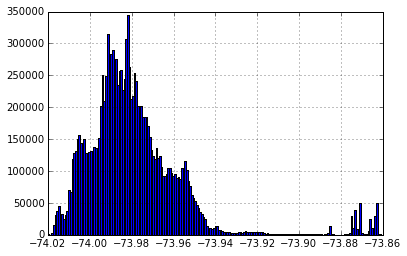

In [6]:
%matplotlib inline
histBinsLo = np.linspace(-74.02,-73.86,200)
df[' pickup_longitude'].hist(bins=histBinsLo)

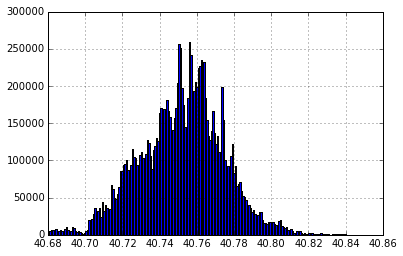

In [7]:
histBinsLa = np.linspace(40.68,40.84,200)
df[' pickup_latitude'].hist(bins=histBinsLa)

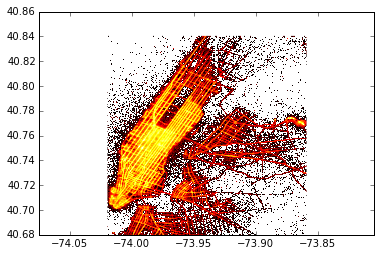

In [8]:
%matplotlib inline
x = df[' pickup_longitude'].values
y = df[' pickup_latitude'].values
plt.hist2d(x,y,bins=[histBinsLo, histBinsLa],norm=matplotlib.colors.LogNorm(),cmap='hot')
limits = plt.axis('equal')